In [3]:
import pandas as pd
import numpy as np


In [4]:
df= pd.read_csv('../../Desktop/DATASET/algorithmictrading/aapl.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB
None
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [7]:
df['Date']=pd.to_datetime(df['Date'],utc=True)  # convert to datetime
df.set_index('Date',inplace=True)   # using date as index

In [8]:
print(df.describe())


             Open        High         Low       Close        Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   152.212146  154.314557  150.133376  152.296180  8.708514e+07   
std     13.032731   12.930480   13.060967   13.071323  2.394169e+07   
min    126.010002  127.769997  124.169998  125.019997  3.519590e+07   
25%    142.284995  144.390332  140.193857  142.229057  7.070485e+07   
50%    150.767914  153.425887  149.112647  151.070007  8.229120e+07   
75%    163.107113  165.498434  161.006612  163.295258  9.603815e+07   
max    177.745892  178.801116  175.904218  178.154053  1.826020e+08   

        Dividends  Stock Splits  
count  251.000000         251.0  
mean     0.003625           0.0  
std      0.028552           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.230000           0.0  


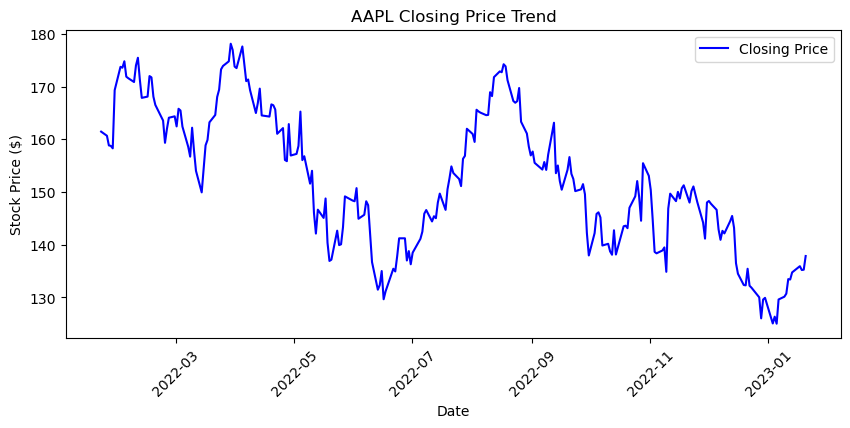

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("AAPL Closing Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [10]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()


In [11]:
df['Buy_Signal'] = (df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1))
df['Sell_Signal'] = (df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1))


In [24]:
print(df.isna().sum())  # Show missing values


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
SMA_20          19
SMA_50          49
Buy_Signal       0
Sell_Signal      0
dtype: int64


In [26]:
df.dropna(inplace=True)


In [28]:
df['Buy_Signal'] = (df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1))
df['Sell_Signal'] = (df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1))


In [30]:
print(f"Total Buy Signals: {df['Buy_Signal'].sum()}")
print(f"Total Sell Signals: {df['Sell_Signal'].sum()}")


Total Buy Signals: 4
Total Sell Signals: 4


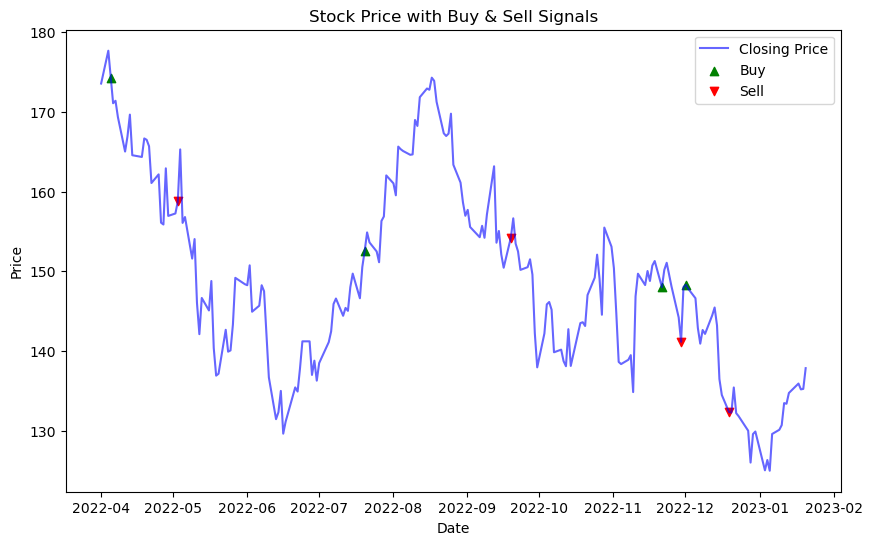

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue', alpha=0.6)  # Price line

# Plot Buy signals
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], label="Buy", marker="^", color='green', alpha=1)

# Plot Sell signals
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], label="Sell", marker="v", color='red', alpha=1)

plt.title("Stock Price with Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
cash = 10000  # Starting money
shares = 0     # Number of shares owned

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i]:  # Buy when signal is True
        shares = cash / df['Close'].iloc[i]  
        cash = 0  

    elif df['Sell_Signal'].iloc[i] and shares > 0:  # Sell when signal is True
        cash = shares * df['Close'].iloc[i]  
        shares = 0  

print(f"Final Cash: ${cash:.2f}")


In [ ]:
from sklearn.metrics import accuracy_score

df['Strategy_Returns'] = df['Close'].pct_change() * df['Buy_Signal'].shift(1)
cumulative_returns = (1 + df['Strategy_Returns']).cumprod()

print(f"Total Return: {cumulative_returns.iloc[-1]:.2f}")


In [ ]:
buy_and_hold_return = df['Close'].iloc[-1] / df['Close'].iloc[0]
print(f"Buy & Hold Return: {buy_and_hold_return:.2f}")



In [ ]:
short_windows = [10, 20, 30]
long_windows = [50, 100, 200]

for short in short_windows:
    for long in long_windows:
        if short < long:
            df[f'SMA_{short}'] = df['Close'].rolling(window=short).mean()
            df[f'SMA_{long}'] = df['Close'].rolling(window=long).mean()
            df['Buy_Signal'] = (df[f'SMA_{short}'] > df[f'SMA_{long}']) & (df[f'SMA_{short}'].shift(1) <= df[f'SMA_{long}'].shift(1))
            df['Sell_Signal'] = (df[f'SMA_{short}'] < df[f'SMA_{long}']) & (df[f'SMA_{short}'].shift(1) >= df[f'SMA_{long}'].shift(1))
            
            print(f"SMA {short}/{long} - Buy Signals: {df['Buy_Signal'].sum()}, Sell Signals: {df['Sell_Signal'].sum()}")


In [ ]:
stop_loss = 0.95
take_profit = 1.10

entry_price = 500
cash = 1000
shares = 5

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i]:
        entry_price = df['Close'].iloc[i]
        shares = cash / entry_price
        cash = 0

    elif shares > 0:
        current_price = df['Close'].iloc[i]
        if current_price <= entry_price * stop_loss or current_price >= entry_price * take_profit:
            cash = shares * current_price
            shares = 0

print(f"Final Cash with Stop Loss & Take Profit: ${cash:.2f}")


##STOCK PRICE PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM ,Dropout
from sklearn.model_selection import train_test_split




df=pd.read_csv('../../Desktop/DATASET/algorithmictrading/aapl.csv',parse_dates=['Date'],index_col=['Date'])
df.head()

In [ ]:
data=df[['Close']].copy()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(data)


In [ ]:
def  create_sequences(data,time_step=50):
    X, y=[],[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)


time_step = 50
X, y = create_sequences(data_scaled, time_step)

In [ ]:
X= X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)), 
    Dropout(0.2),  
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),  
    Dense(1)  
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
import numpy as np
val_loss = 0.0138  # Your val_loss
rmse = np.sqrt(val_loss)
print(f'Validation RMSE: {rmse:.4f}')


In [ ]:
# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))  # Convert back to original scale

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+time_step+1:], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price")
plt.plot(df.index[train_size+time_step+1:], predictions, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.show()
